# Optimized Python Implementation

In the previous workbooks, a simple implementation was provided in pure python. For performance optimized linear algebra operations, extension modules are provided by Numpy, SciPy, etc. The redblackgraph module also provides extension model implementations that are described below

## rb.array / rb.matrix

The redblackgraph module provides two Numpy-like implementations, one of array and one of matrix.

The distinctive characteristics of these classes are matrix multiplication has been overridden to support Red Black Graph linear algebra. As well as methods being defined for `transitive_closure` and `relational_composition`

To motivate the examples, let's model my familial relationshps. I'm (D) the child of Ewald (E) and Regina (R). Ewald and Marta (M) also have a child, my half-brother, Harald (H). Ewald's parents were Michael (Mi) and Amalie (A). Regenia's parents were John (J) and Inez (I). John also had a son Donald (Do) with Evelyn (Ev). Michael's parents were George (G) and Mariea (Ma). Finally, John's parents were Samuel (S) and Emeline (Em).

This set of relationships is represented by the graph below

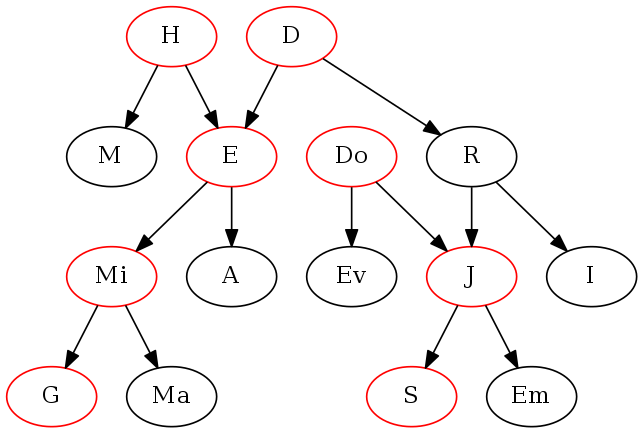

In [2]:
import networkx as nx
from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_node('D', color='red')
G.add_node('E', color='red')
G.add_node('H', color='red')
G.add_node('Mi', color='red')
G.add_node('J', color='red')
G.add_node('Do', color='red')
G.add_node('G', color='red')
G.add_node('S', color='red')
G.add_node('R', color='black')
G.add_node('M', color='black')
G.add_node('A', color='black')
G.add_node('I', color='black')
G.add_node('Ev', color='black')
G.add_node('Ma', color='black')
G.add_node('Em', color='black')
G.add_edge('D', 'E')
G.add_edge('D', 'R')
G.add_edge('H', 'E')
G.add_edge('H', 'M')
G.add_edge('E', 'Mi')
G.add_edge('E', 'A')
G.add_edge('Mi', 'G')
G.add_edge('Mi', 'Ma')
G.add_edge('J', 'S')
G.add_edge('J', 'Em')
G.add_edge('Do', 'J')
G.add_edge('Do', 'Ev')
G.add_edge('R', 'J')
G.add_edge('R', 'I')
draw(G, show='ipynb')

We'll model this as a RedBlackGraph denoting each vertex numerically in the order introduced in the above narrative, e.g. D:0, E:1, R:2, M:3, H:4, Mi:5, A:6, J:7, I:8, Do:9, Ev:10, G:11, Ma:12, S:13, Em14

In these examples, we'll first calculate transitive closure then we'll remove the node (row/column) for John, create the simple row and column vectors for John and use a relational composition to recostruct a transitive closure equivalent. Finally we'll get some timings to compare implementations.

In [3]:
import redblackgraph as rb
import numpy as np

## Simple Implementation

In [4]:
import redblackgraph.simple as smp
import copy
#      D   E   R   M   H  Mi   A   J   I  Do  Ev   G  Ma   S  Em
A = [[-1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # D
     [ 0, -1,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0], # E
     [ 0,  0,  1,  0,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0], # R
     [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # M
     [ 0,  2,  0,  3, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # H
     [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  2,  3,  0,  0], # Mi
     [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0], # A
     [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  2,  3], # J
     [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0], # I
     [ 0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  3,  0,  0,  0,  0], # Do
     [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], # Ev
     [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0], # G
     [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0], # Ma
     [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0], # S
     [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]  # Em
    ]
B = copy.deepcopy(A)
A_star, diameter = smp.warshall(B)
print(f"A_star:\n{A_star} \ndiameter: {diameter}")

A_star:
[[-1  2  3  0  0  4  5  6  7  0  0  8  9 12 13]
 [ 0 -1  0  0  0  2  3  0  0  0  0  4  5  0  0]
 [ 0  0  1  0  0  0  0  2  3  0  0  0  0  4  5]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  3 -1  4  5  0  0  0  0  8  9  0  0]
 [ 0  0  0  0  0 -1  0  0  0  0  0  2  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  0  0  2  3]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0 -1  3  0  0  4  5]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]] 
diameter: 3


In [5]:
#       D   E   R   M   H  Mi   A   I  Do  Ev   G  Ma   S  Em
A1 = [[-1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # D
      [ 0, -1,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0], # E
      [ 0,  0,  1,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0], # R
      [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # M
      [ 0,  2,  0,  3, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0], # H
      [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  3,  0,  0], # Mi
      [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0], # A
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0], # I
      [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  3,  0,  0,  0,  0], # Do
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], # Ev
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0], # G
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0], # Ma
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0], # S
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]  # Em
     ]
B1 = copy.deepcopy(A1)
A1_star, diameter = smp.warshall(B1)
print(f"A1_star:\n{A1_star} \ndiameter: {diameter}")

A1_star:
[[-1  2  3  0  0  4  5  7  0  0  8  9  0  0]
 [ 0 -1  0  0  0  2  3  0  0  0  4  5  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  3 -1  4  5  0  0  0  8  9  0  0]
 [ 0  0  0  0  0 -1  0  0  0  0  2  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]] 
diameter: 3


**Observation**: I am no longer related to Samuel nor Emeline, but that the diameter is still 3 (my relationship to George and Mariea).

Let's look at the row (u) and column (v) vectors that would define John in relationship to A1 as well as the relational_composition of A1 with u and v.

In [6]:
#      D   E   R   M   H  Mi   A   I  Do  Ev   G  Ma   S  Em   J
u = [[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3, -1]] 
v = [[ 0], # D  
     [ 0], # E
     [ 2], # R
     [ 0], # M
     [ 0], # H
     [ 0], # Mi
     [ 0], # A
     [ 0], # I
     [ 2], # Do
     [ 0], # Ev
     [ 0], # G
     [ 0], # Ma
     [ 0], # S
     [ 0], # Em
     [-1]] # J
A_lambda = smp.relational_composition(u, A1, v)
A_lambda

[[-1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 13, 6],
 [0, -1, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 5, 2],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 2, 3, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, -1, 3, 0, 0, 4, 5, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, -1]]

In [7]:
%%timeit
B1 = copy.deepcopy(A1)
A1_star, diameter = smp.warshall(B1)

9.32 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
A_lambda = smp.relational_composition(u, A1, v)

457 µs ± 9.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Optimized Implementation

In [9]:
#               D   E   R   M   H  Mi   A   J   I  Do  Ev   G  Ma   S  Em
A = rb.array([[-1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # D
              [ 0, -1,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0], # E
              [ 0,  0,  1,  0,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0], # R
              [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # M
              [ 0,  2,  0,  3, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # H
              [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  2,  3,  0,  0], # Mi
              [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0], # A
              [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  2,  3], # J
              [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0], # I
              [ 0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  3,  0,  0,  0,  0], # Do
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], # Ev
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0], # G
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0], # Ma
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0], # S
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]  # Em
             ], dtype=np.int32)

In [10]:
A_star, diameter = A.transitive_closure()
print(f"A_star:\n{A_star} \ndiameter: {diameter}")

A_star:
[[-1  2  3  0  0  4  5  6  7  0  0  8  9 12 13]
 [ 0 -1  0  0  0  2  3  0  0  0  0  4  5  0  0]
 [ 0  0  1  0  0  0  0  2  3  0  0  0  0  4  5]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  3 -1  4  5  0  0  0  0  8  9  0  0]
 [ 0  0  0  0  0 -1  0  0  0  0  0  2  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  0  0  2  3]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0 -1  3  0  0  4  5]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]] 
diameter: 3


For illustrative purposes, let's remove John from the rb.array representation of the graph

In [11]:
#                D   E   R   M   H  Mi   A   I  Do  Ev   G  Ma   S  Em
A1 = rb.array([[-1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # D
               [ 0, -1,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0], # E
               [ 0,  0,  1,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0], # R
               [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], # M
               [ 0,  2,  0,  3, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0], # H
               [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  3,  0,  0], # Mi
               [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0], # A
               [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0], # I
               [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  3,  0,  0,  0,  0], # Do
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], # Ev
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0], # G
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0], # Ma
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0], # S
               [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]  # Em
              ], dtype=np.int32)
A1_star, diameter = A1.transitive_closure()
print(f"A1_star:\n{A1_star} \ndiameter: {diameter}")

A1_star:
[[-1  2  3  0  0  4  5  7  0  0  8  9  0  0]
 [ 0 -1  0  0  0  2  3  0  0  0  4  5  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  3 -1  4  5  0  0  0  8  9  0  0]
 [ 0  0  0  0  0 -1  0  0  0  0  2  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]] 
diameter: 3


**Observation**: I am no longer related to Samuel nor Emeline, but that the diameter is still 3 (my relationship to George and Mariea).

Let's look at the row (u) and column (v) vectors that would define John in relationship to A1 as well as the relational_composition of A1 with u and v.

In [12]:
#               D   E   R   M   H  Mi   A   I  Do  Ev   G  Ma   S  Em
u = rb.array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3, -1]], dtype=np.int32) 
v = rb.array([[ 0],  
              [ 0],
              [ 2],
              [ 0],
              [ 0],
              [ 0],
              [ 0],
              [ 0],
              [ 2],
              [ 0],
              [ 0],
              [ 0],
              [ 0],
              [ 0],
              [-1]], dtype=np.int32) 

u_lambda = u[:,:-1] @ A1_star
v_lambda = A1_star @ v[:-1,:]
print(f"u_lambda:\n{u_lambda}")
print(f"v_lambda:\n{v_lambda}")

A_lambda = A1_star.relational_composition(u, v)
print(f"A_lambda:\n{A_lambda}")

u_lambda:
[[0 0 0 0 0 0 0 0 0 0 0 0 2 3]]
v_lambda:
[[6]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]]
A_lambda:
[[-1  2  3  0  0  4  5  7  0  0  8  9 12 13  6]
 [ 0 -1  0  0  0  2  3  0  0  0  4  5  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  4  5  2]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  3 -1  4  5  0  0  0  8  9  0  0  0]
 [ 0  0  0  0  0 -1  0  0  0  0  2  3  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  3  0  0  4  5  2]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  3 -1]]


In [13]:
%%timeit
A_star, diameter = A.transitive_closure()

26.7 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%%timeit
A_lambda = A1_star.relational_composition(u, v)

42.3 µs ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
from numpy.linalg import det
det(A_lambda)

0.99999999999999978

In [16]:
A_lambda.cardinality()

{'black': 7, 'red': 8}